https://github.com/rickiepark/introduction_to_ml_with_python

In [8]:
# pip install mglearn

In [3]:
%matplotlib inline
from preamble import *

ModuleNotFoundError: No module named 'preamble'

In [4]:
import mglearn

In [5]:
from scipy import sparse

In [6]:
from sklearn.datasets import make_blobs

지도 학습 - 데이터와 타겟O
- label 있음
비지도 학습- 타겟x
- 정답/결과가 없다.
- label 없음
강화 학습


데이터 생김새에 따라 모델을 정한다





데이터
알고리즘
모델


파이썬
넘파이
판다스
matpotlib
scipy
mglearn

In [7]:
import sys
print("Python 버전:", sys.version)

import pandas as pd
print("pandas 버전:", pd.__version__)

import matplotlib
print("matplotlib 버전:", matplotlib.__version__)

import numpy as np
print("NumPy 버전:", np.__version__)

import scipy as sp
print("SciPy 버전:", sp.__version__)

import IPython
print("IPython 버전:", IPython.__version__)

import sklearn
print("scikit-learn 버전:", sklearn.__version__)

Python 버전: 3.7.6 (default, Jan  8 2020, 13:42:34) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
pandas 버전: 1.0.1
matplotlib 버전: 3.1.3
NumPy 버전: 1.18.1
SciPy 버전: 1.4.1
IPython 버전: 7.12.0
scikit-learn 버전: 0.22.1


In [8]:
import numpy as np

x = np.array([[1, 2, 3], [4, 5, 6]])
print("x:\n", x)

x:
 [[1 2 3]
 [4 5 6]]


In [9]:
from scipy import sparse

# 대각선 원소는 1이고 나머지는 0인 2차원 NumPy 배열을 만듭니다
eye = np.eye(4)
print("NumPy 배열:\n", eye)

NumPy 배열:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [10]:
# NumPy 배열을 CSR 포맷의 SciPy 희박 행렬로 변환합니다.
# 0이 아닌 원소만 저장됩니다.
sparse_matrix = sparse.csr_matrix(eye)
print("\nSciPy의 CSR 행렬:\n", sparse_matrix)



SciPy의 CSR 행렬:
   (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


In [11]:
data = np.ones(4)
row_indices = np.arange(4)
col_indices = np.arange(4)
eye_coo = sparse.coo_matrix((data, (row_indices, col_indices)))
print("COO 표현:\n", eye_coo)

COO 표현:
   (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


### matplotlib

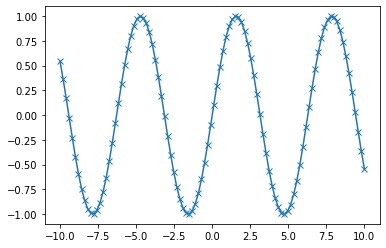

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

# -10에서 10까지 100개의 간격으로 나뉘어진 배열을 생성합니다.
x = np.linspace(-10, 10, 100)
# 사인 함수를 사용하여 y 배열을 생성합니다.
y = np.sin(x)
# plot 함수는 한 배열의 값을 다른 배열에 대응해서 선 그래프를 그립니다.
plt.plot(x, y, marker="x")

In [13]:
import pandas as pd

# 회원 정보가 들어간 간단한 데이터셋을 생성합니다.
data = {'Name': ["John", "Anna", "Peter", "Linda"],
        'Location' : ["New York", "Paris", "Berlin", "London"],
        'Age' : [24, 13, 53, 33]
       }

data_pandas = pd.DataFrame(data)
# IPython.display는 주피터 노트북에서 Dataframe을 미려하게 출력해줍니다.
display(data_pandas)

,Name,Location,Age
0,John,New York,24
1,Anna,Paris,13
2,Peter,Berlin,53
3,Linda,London,33


In [14]:
# Age 열의 값이 30 이상인 모든 행을 선택합니다.
display(data_pandas[data_pandas.Age > 30])

,Name,Location,Age
2,Peter,Berlin,53
3,Linda,London,33


## 첫 번째 애플리케이션: 붓꽃의 품종 분류¶
 

### 데이터 적재¶
 

In [15]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [16]:
print("iris_dataset의 키:\n", iris_dataset.keys())


iris_dataset의 키:
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [17]:
print(iris_dataset['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [18]:
print(iris_dataset['DESCR'][:193] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


In [19]:
print("타깃의 이름:", iris_dataset['target_names'])

타깃의 이름: ['setosa' 'versicolor' 'virginica']


In [20]:
print("data의 크기:", iris_dataset['data'].shape)

data의 크기: (150, 4)


In [21]:
print("data의 처음 다섯 행:\n", iris_dataset['data'][:5])

data의 처음 다섯 행:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [22]:
print("target의 타입:", type(iris_dataset['target']))

target의 타입: <class 'numpy.ndarray'>


In [23]:
print("target의 크기:", iris_dataset['target'].shape)

target의 크기: (150,)


In [24]:
print("타깃:\n", iris_dataset['target'])

타깃:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### 성과 측정: 훈련 데이터와 테스트 데이터¶

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

In [26]:
# 8:2로 자동으로 분류해준다.
print("X_train 크기:", X_train.shape)
print("y_train 크기:", y_train.shape)

X_train 크기: (112, 4)
y_train 크기: (112,)


In [27]:
print("X_test 크기:", X_test.shape)
print("y_test 크기:", y_test.shape)

X_test 크기: (38, 4)
y_test 크기: (38,)


### 가장 먼저 할 일: 데이터 살펴보기¶
 

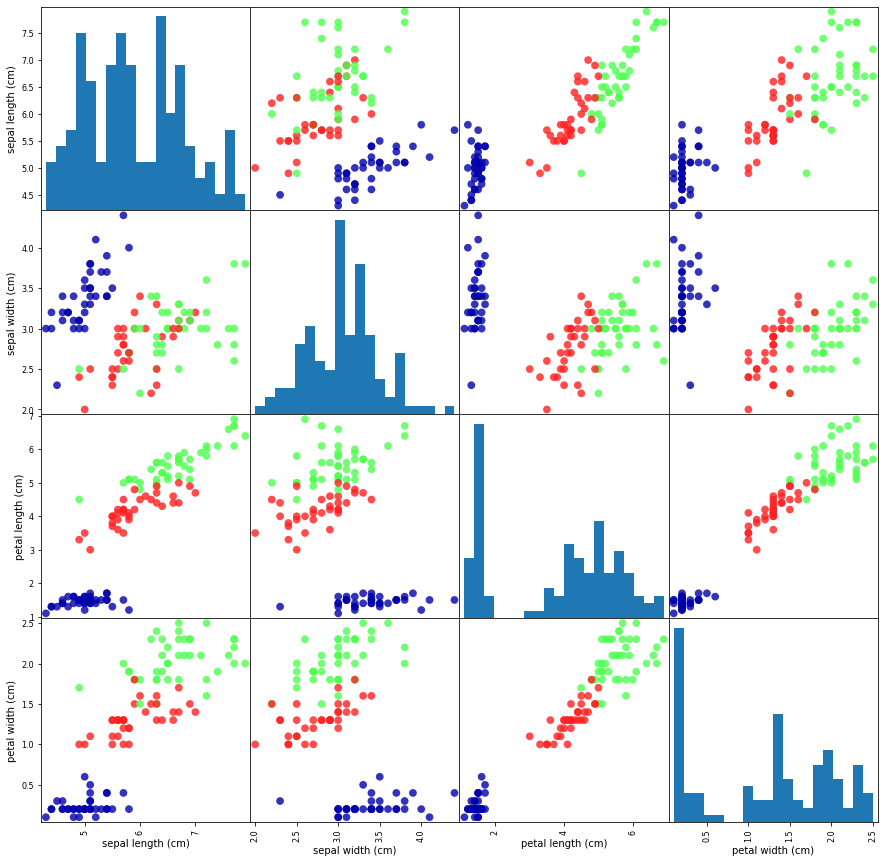

In [28]:
# X_train 데이터를 사용해서 데이터프레임을 만듭니다.
# 열의 이름은 iris_dataset.feature_names에 있는 문자열을 사용합니다.
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# 데이터프레임을 사용해 y_train에 따라 색으로 구분된 산점도 행렬을 만듭니다.
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o',
                           hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3)
plt.show() # 책에는 없음

## 첫 번째 머신 러닝 모델: k-최근접 이웃 알고리즘¶(08.03)
오전: KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [30]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

### 예측하기¶ 

In [31]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape:", X_new.shape)

X_new.shape: (1, 4)


In [32]:
prediction = knn.predict(X_new)
print("예측:", prediction)
print("예측한 타깃의 이름:", 
       iris_dataset['target_names'][prediction])
# 에측한 것이 정말 맞나?

예측: [0]
예측한 타깃의 이름: ['setosa']


### 모델 평가하기¶
 

In [33]:
# 평가는 test셋으로 한다. 테스트 셋은 20~25%
# 38개 데이터(X_test)
y_pred = knn.predict(X_test)
print("테스트 세트에 대한 예측값:\n", y_pred)

테스트 세트에 대한 예측값:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [34]:
print("테스트 세트의 정확도: {:.2f}".format(np.mean(y_pred == y_test)))

테스트 세트의 정확도: 0.97


In [35]:
# score 메소드를 사용해 정확도 측정
print("테스트 세트의 정확도: {:.2f}".format(knn.score(X_test, y_test)))

테스트 세트의 정확도: 0.97


- 데이터 가져오기
- 데이터 나누기
- 모델
- 예측 값과 실제 값 비교
- 평가

## 지도 학습
분류(빨강이냐 파랑)와 예측(피자 판매량, 연봉 상승률.) 라벨링 vs 숫자

## 비지도 학습은 labeling이 없다



### 요약¶ 

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

print("테스트 세트의 정확도: {:.2f}".format(knn.score(X_test, y_test)))

테스트 세트의 정확도: 0.97


# 지도 학습

## 분류와 회귀

## 일반화, 과대적합, 과소적합
과대적합: 
- 훈련세트에 너무 적합하게 만들어서 새로운 걸 집어넣으면 맞추지 못한다.
특성을 너무 따지는 것

데이터와 속성


과소적합:
- 속성 구분이 부족하게 이뤄짐
<br>
예: 보트 구매 여부 관련 데이터 10개. 그런데 나이가 45세 이상인 것만 가지고 한다면, 나머지 특성은 고려가 되지 않은 것이기 때문에 정답이 하나만 나오게 된다. "45세 이상이면 산다." 
특성을 너무 따지지 않는다.


<br><br><br><br>




- 훈련이 높으면 과대적합, 테스트가 높으면 과소적합. 
- 둘 다 비슷하면 일반화 되었다. 가장 좋은 모델. 모델을 만들어 평가. 과대적합과 과소적합을 줄이는 값을 가진 모델이 가장 좋은 모델. 
- 속성값을 조정함으로 과소적합과 과대적합의 접점을 만든다. (파라미터를 만진다)




### 모델 복잡도와 데이터셋 사이즈의 관계
## 지도 학습 알고리즘¶

In [39]:
# 폰트
# import matplotlib
# from matplotlib import font_manager, rc
# import platform
# rc('font', family='AppleGothic')

X.shape: (26, 2)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


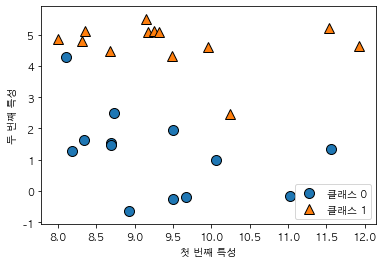

In [42]:
from sklearn.datasets import make_blobs
import matplotlib.font_manager as fm
plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False)

# 데이터셋을 만듭니다
X, y = mglearn.datasets.make_forge()
# 산점도를 그립니다
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["클래스 0", "클래스 1"], loc=4)
plt.xlabel("첫 번째 특성")
plt.ylabel("두 번째 특성")
print("X.shape:", X.shape)

Text(0, 0.5, '타깃')

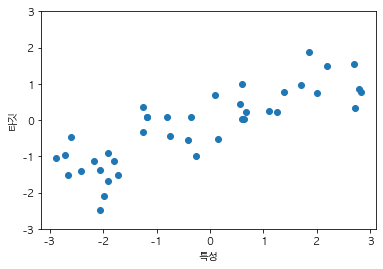

In [43]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("특성")
plt.ylabel("타깃")

In [46]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n", cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [53]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [47]:
print("유방암 데이터의 형태:", cancer.data.shape)

유방암 데이터의 형태: (569, 30)


In [48]:
print("클래스별 샘플 갯수:\n",
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

클래스별 샘플 갯수:
 {'malignant': 212, 'benign': 357}


In [49]:
print("특성 이름:\n", cancer.feature_names)

특성 이름:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [50]:
from sklearn.datasets import load_boston
boston = load_boston()
print("데이터의 형태:", boston.data.shape)

데이터의 형태: (506, 13)


In [51]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape:", X.shape)

X.shape: (506, 104)


## k-최근접 이웃
### k-최근접 이웃 분류

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


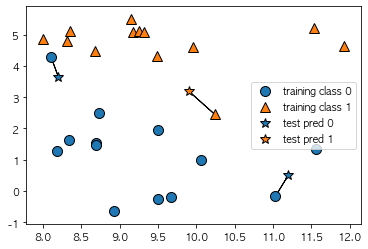

In [54]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

별표 세개
KNN 특징
K의 개수. 가장 가까운 옆에 있는 애들으 숫자. 그걸 

In [55]:

from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [57]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [58]:
# 훈련
clf.fit(X_train, y_train)
# neighbor 숫자는 항상 홀수(짝수 일 때 다수결이 안 나기 때문)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [59]:
print("테스트 세트 예측:", clf.predict(X_test))

테스트 세트 예측: [1 0 1 0 1 0 0]


In [60]:
print("테스트 세트 정확도: {:.2f}".format(clf.score(X_test, y_test)))

테스트 세트 정확도: 0.86


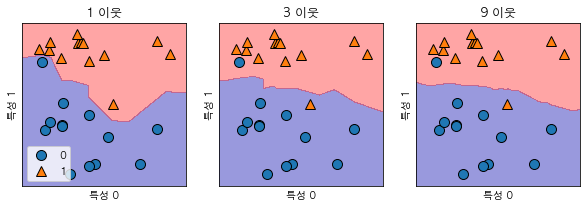

In [61]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # fit 메소드는 self 오브젝트를 리턴합니다
    # 그래서 객체 생성과 fit 메소드를 한 줄에 쓸 수 있습니다
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend(loc=3)

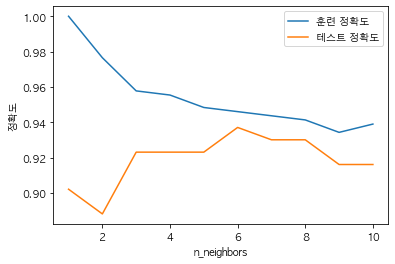

In [62]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# 1 에서 10 까지 n_neighbors 를 적용
# 10번 돌린다
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train)) #훈련세트와 정확도 10번
    # 일반화 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="훈련 정확도")
plt.plot(neighbors_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()

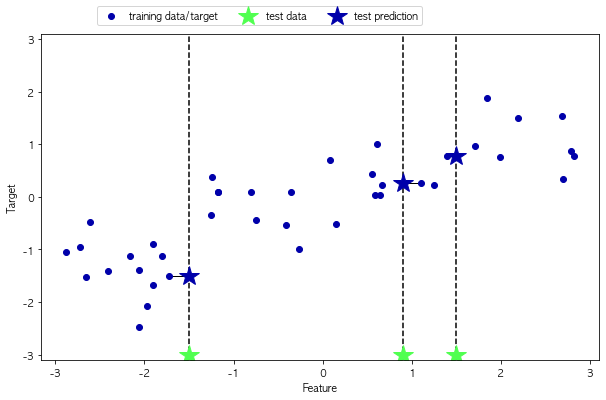

In [63]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

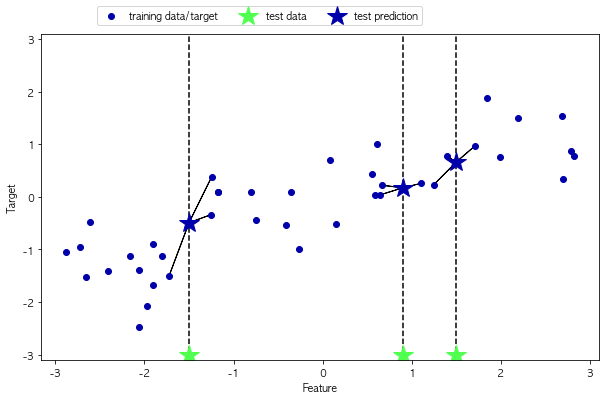

In [64]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [65]:
from sklearn.neighbors import KNeighborsRegressor
# KNNRegressor = 예측기           앞선 classifier=분류기

X, y = mglearn.datasets.make_wave(n_samples=40)

# wave 데이터셋을 훈련 세트와 테스트 세트로 나눕니다
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 이웃의 수를 3으로 하여 모델의 객체를 만듭니다
reg = KNeighborsRegressor(n_neighbors=3) # 셋팅값 3
# 훈련 데이터와 타깃을 사용하여 모델을 학습시킵니다
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [66]:
print("테스트 세트 예측:\n", reg.predict(X_test))
# 예측 값 출력
# 

테스트 세트 예측:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [68]:
print("테스트 세트 R^2: {:.2f}".format(reg.score(X_test, y_test)))

테스트 세트 R^2: 0.83


### KNeighborsRegressor 분석¶ 

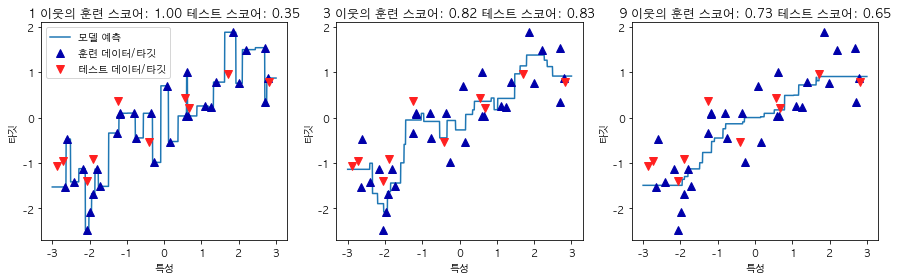

In [69]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# -3 과 3 사이에 1,000 개의 데이터 포인트를 만듭니다
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # 1, 3, 9 이웃을 사용한 예측을 합니다
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} 이웃의 훈련 스코어: {:.2f} 테스트 스코어: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")
axes[0].legend(["모델 예측", "훈련 데이터/타깃", "테스트 데이터/타깃"], loc="best")

- KNN
- 결정나무
- CNN


KNN은 데이터 숫자와 데이터를 파악하기 위해 사용 한다. 상업용으로 사용하기에는 정확도가 높지 않다.


# 선형모델

### 선형 회귀 모델¶ 
- 선형 모델은 대부분 예측이 쓰인다. 예측은 회귀라고 하는데 회귀 모델은 통계, 사회 과학 쪽에서 쓰는 기법인데 설문조사 하고 평균 내고 한다. 분포를 내고 평균선을 그어준다.
- 기울기 구하기 y = ax+b
- 특성을 일반화 시켜주는. 전체적으로 보았을 때 일반화 되어있는 모델.
- 과적합시에는 직선이 아니라 삐뚤빼둘. 

w[0]: 0.393906  b: -0.031804


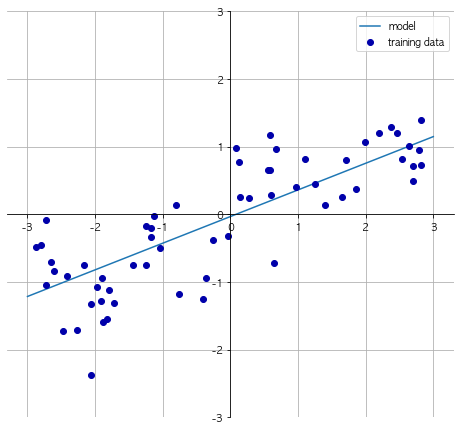

In [70]:
mglearn.plots.plot_linear_regression_wave()
# 선형에 예측기를 가져다 mglearn으로 그렸다. w는 기울기 값. 여기서는 기울기 b는 y절편
# KNN에서는 파라미터를 이웃의 갯수를 조절. 선형모델에서는 이 둘을 만진다.
# 예측의 오차값을 줄이는 선형모델을 만드는 일. 평균 오차 값을 줄이는. 두 개의 파라미터를 조절해가면서.


### 선형회귀(최소제곱법)¶ 

In [71]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [72]:
print("lr.coef_:", lr.coef_) # w는 coef에 넣고
print("lr.intercept_:", lr.intercept_) # b는 intercept에 넣고
# wave라는 데이터를 가져다

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [73]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))
# 실망스러운 점수

훈련 세트 점수: 0.67
테스트 세트 점수: 0.66


In [74]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [75]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))
# 과적합
# 훈련이 높고 테스트가 낮으면 과적합. 그러니 파라미터를 만져 사이를 줄여야 한다.

훈련 세트 점수: 0.95
테스트 세트 점수: 0.61


### 릿지 회귀¶
 

In [79]:
# 보스턴 집값을 릿지에 돌리면
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge.score(X_test, y_test)))
# 써먹을 정도는 아니지만 14% 올랐다 테스트 점수


# 알파값을 만진다, 기울기 조정하기 위해. 0에 가깝게, 

훈련 세트 점수: 0.89
테스트 세트 점수: 0.75


In [77]:
# 알파값 10으로 올려 돌렸다.
# 전체적으로 안 좋아졌다.
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge10.score(X_test, y_test)))

훈련 세트 점수: 0.79
테스트 세트 점수: 0.64


In [78]:
# 알파값 0.1
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge01.score(X_test, y_test)))

훈련 세트 점수: 0.93
테스트 세트 점수: 0.77


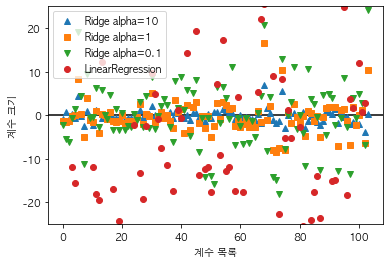

In [80]:
# 위에서 구한 3개를 그림으로 그림
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

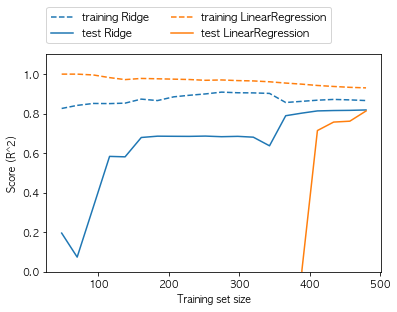

In [81]:
mglearn.plots.plot_ridge_n_samples()

릿지
- 데이터가 많아지면 계산이 어려워지는 단점이 있다,
- 선형을 보완한게 릿지. 
- 라소
- 라소는 L1
- 특징 개수 값이 0에 가까운. 값을 버려 모델을 만들 때 시간을 줄이고 효율을 높인다.
- 특징이 줄어들면 과적합이 일어날 확률이 줄어든다.(데이터가 많으면 데이터를 쫓는다고 과적합이 일어날 확률이 높아진다.)
- 라소는 특징을 버린다.


In [82]:
# 특성 104개 중 4개만 사용

from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 개수:", np.sum(lasso.coef_ != 0))

훈련 세트 점수: 0.29
테스트 세트 점수: 0.21
사용한 특성의 개수: 4


In [83]:
# 알파값 0.01
# 사용한 특성의 개수가 다르다.

# "max_iter" 기본 값을 증가시키지 않으면 max_iter 값을 늘이라는 경고가 발생합니다
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성의 개수:", np.sum(lasso001.coef_ != 0))

훈련 세트 점수: 0.90
테스트 세트 점수: 0.77
사용한 특성의 개수: 33


In [84]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 개수:", np.sum(lasso00001.coef_ != 0))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.64
사용한 특성의 개수: 96


Text(0, 0.5, '계수 크기')

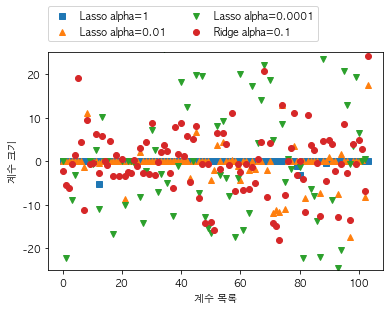

In [85]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")

- 릿지와 라소 둘 다 만져야 한다.
- 릿지에서 사용했던 건 weight 값.
- 라소는 L1 특징의 개수를 넣고 뺀다.
특징이 많아지면 과적합이 일어날 확률이 많아진다.
라소는 과적합 방지에 기여. 릿지는 오차를 줄이는데 기여
선형에서는 오차 줄이고 특징을 줄이면서(중요도가 높은 특징들만 선택해서 사용) 그 때 모델이 과적합도 줄어들고 일반화 될 수 있는 길이다
선형모델에는 이 두 가지에 중점을 둬서 모델을 찾아내면 된다.

선형, 릿지, 라소
일락스틱 넷은 릿지와 라소를 사용

예측 선형 모델로 

### 분류에 대한 선형 모델
사이킷런 0.19 버전 이하에서는 LinearSVC와 liblinear를 사용하는 LogisticRegression의 verbose 매개변수가 0이 아니고 max_iter 반복 안에 수렴하지 않을 경우 반복 횟수를 증가하라는 경고 메세지가 나옵니다. 사이킷런 0.20 버전부터는 verbose 매개변수에 상관없이 max_iter 반복 안에 수렴하지 않을 경우 반복 횟수 증가 경고가 나옵니다.

향후 사이킷런 0.22 버전에서 LogisticRegression 클래스의 solver 매개변수 기본값이 liblinear에서 lbfgs로 변경될 예정입니다. 사이킷런 0.20 버전에서 solver 매개변수를 지정하지 않는 경우 이에 대한 경고 메세지를 출력합니다.

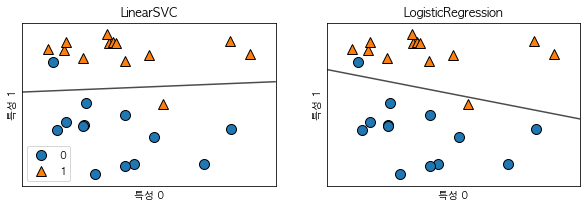

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(max_iter=5000), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend()

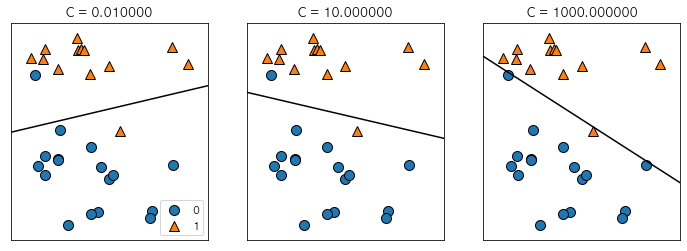

In [88]:
mglearn.plots.plot_linear_svc_regularization()

## 오후 

In [89]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression(max_iter=5000).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg.score(X_test, y_test)))

훈련 세트 점수: 0.958
테스트 세트 점수: 0.958


In [90]:
# 기울기 값 조정. 알파로 불렸던 것이 이번엔 C
logreg100 = LogisticRegression(C=100, max_iter=5000).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg100.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg100.score(X_test, y_test)))

훈련 세트 점수: 0.981
테스트 세트 점수: 0.965


In [91]:
logreg001 = LogisticRegression(C=0.01, max_iter=5000).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg001.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg001.score(X_test, y_test)))

훈련 세트 점수: 0.953
테스트 세트 점수: 0.951


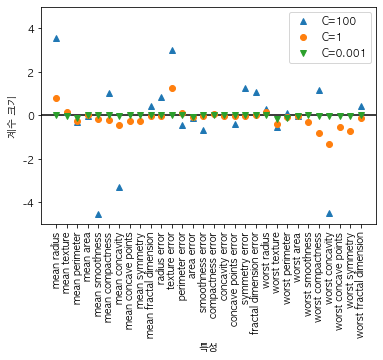

In [92]:
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.legend()

- lasso는 속성을 없애는
규제 방법은 L1

사이킷런 0.20 버전부터는 LogisticRegression의 solver 매개변수가 liblinear일 경우 알고리즘이 수렴에 도달하지 못하면 max_iter 매개변수를 증가시키라는 경고 메세지가 출력됩니다. LogisticRegression의 max_iter 매개변수 기본값은 100입니다.

사이킷런 0.22 버전부터는 LogisticRegression의 solver 매개변수 기본값이 lbfgs로 변경되었습니다. lbfgs는 L1 규제를 지원하지 않습니다. 따라서 solver 매개변수를 liblinear로 지정합니다.

C=0.001 인 l1 로지스틱 회귀의 훈련 정확도: 0.91
C=0.001 인 l1 로지스틱 회귀의 테스트 정확도: 0.92
C=1.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.96
C=1.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.96
C=100.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.99
C=100.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.98


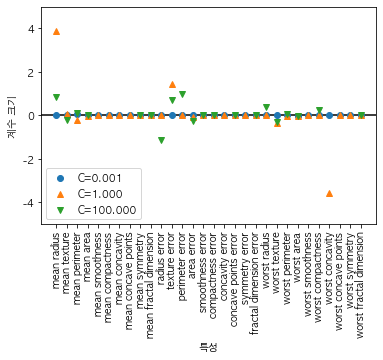

In [99]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(solver='liblinear', C=C, penalty="l1", max_iter=1000).fit(X_train, y_train)
    print("C={:.3f} 인 l1 로지스틱 회귀의 훈련 정확도: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("C={:.3f} 인 l1 로지스틱 회귀의 테스트 정확도: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("특성")
plt.ylabel("계수 크기")

plt.ylim(-5, 5)
plt.legend(loc=3)

# 100일 때 가장 좋게 나오고 있다.
# 분류는 SVC, LR  기울ㄹ기와  속성을 줄여서
# 이중분류

### 다중 클래스 분류를 위한 선형 모델¶
 

- 앞에서 했던 LR과 SVC를 사용한다. 
- 기준의 외의 것들
- 클래스 0을 기준으로 한다면 클래스 0 외의 것들
- 기울기 만지고, 속성도 줄인다. 
- 3개를 만들고, 정확도가 가장 높은 모델을 분류기로 사용한다.

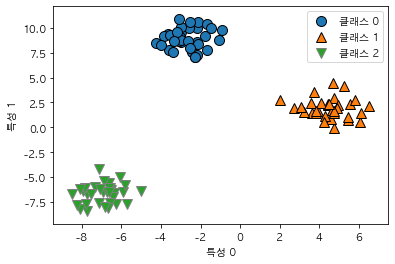

In [100]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0", "클래스 1", "클래스 2"])

In [95]:
 linear_svm = LinearSVC().fit(X, y)
print("계수 배열의 크기: ", linear_svm.coef_.shape)
print("절편 배열의 크기: ", linear_svm.intercept_.shape)

계수 배열의 크기:  (3, 2)
절편 배열의 크기:  (3,)


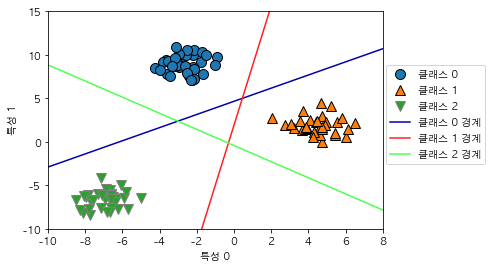

In [96]:
# SVM으로 그림.
# 가운데 삼각형에 테스트 셋이 들어간다면

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계',
            '클래스 2 경계'], loc=(1.01, 0.3))

Text(0, 0.5, '특성 1')

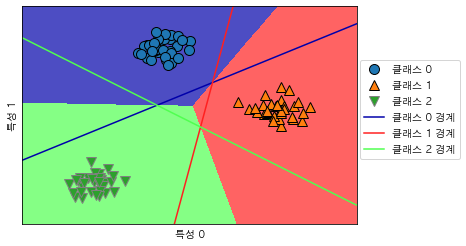

In [101]:
# 

mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계',
            '클래스 2 경계'], loc=(1.01, 0.3))
plt.xlabel("특성 0")
plt.ylabel("특성 1")

### 장단점과 매개변수¶

속성은 L1 규제, 기울기는 L2 규제


In [102]:
# 한 줄에서 모델의 객체를 생성과 학습을 한번에 실행합니다
logreg = LogisticRegression(max_iter=5000).fit(X_train, y_train)

In [103]:
logreg = LogisticRegression(max_iter=5000)
y_pred = logreg.fit(X_train, y_train).predict(X_test)

In [104]:
y_pred = LogisticRegression(max_iter=5000).fit(X_train, y_train).predict(X_test)

#### 나이브 베이즈 분류기¶ 

In [108]:
x  = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

In [109]:
counts = {}
for label in np.unique(y):
    # 각 클래스에 대해 반복
    # 특성마다 1 이 나타난 횟수를 센다.
    counts[label] = X[y == label].sum(axis=0)
print("특성 카운트:\n", counts)

IndexError: boolean index did not match indexed array along dimension 0; dimension is 100 but corresponding boolean dimension is 4